# Amazon Product Insights:
#### Uncovering Pricing, Ratings, and Reviews

This dataset  capture information about products listed on Amazon, including their details, pricing, discounts, ratings, reviews, and associated user informationIt.could be used for various analyses such as understanding customer feedback, product popularity, and pricing strategies.

## Hypothesis

1.Products with higher discounts have a higher likelihood of receiving a larger number of reviews

2.Products with higher average ratings tend to have a higher number of reviews.

3.Products with higher original prices tend to have higher average ratings.

4.Some product categories tend to have higher average discounts than others

5.Products with higher average ratings tend to have a higher proportion of positive reviews in their content.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway

In [2]:
data = pd.read_csv("amazon.csv")

In [3]:
df=data.copy()

In [4]:
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [5]:
data.shape

(1465, 16)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [7]:
missing_values = df.isnull().sum()

missing_values

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

### convert important feature in numerical columns

In [8]:

import re

# Custom function to clean and extract numeric values
def clean_and_extract_number(s):
    cleaned_value = re.sub(r'[^\d.]', '', str(s))  # Remove non-numeric characters
    return cleaned_value

# List of columns to convert to numeric
numeric_columns = ['discounted_price', 'actual_price','rating','rating_count','discount_percentage']

# Clean and extract numeric values
for col in numeric_columns:
    df[col] = df[col].apply(clean_and_extract_number)

# Convert the columns to numeric data type
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Display the DataFrame with numeric columns
df.head()


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,64,4.2,24269.0,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,43,4.0,43994.0,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,90,3.9,7928.0,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,53,4.2,94363.0,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,61,4.2,16905.0,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [9]:
df.dtypes

product_id              object
product_name            object
category                object
discounted_price       float64
actual_price           float64
discount_percentage      int64
rating                 float64
rating_count           float64
about_product           object
user_id                 object
user_name               object
review_id               object
review_title            object
review_content          object
img_link                object
product_link            object
dtype: object

### fill the missing values

In [10]:
# Calculate the median values of the columns
amount_median = df['rating_count'].median()
# Fill missing values with median values
df['rating_count'].fillna(amount_median, inplace=True)

# Calculate the median values of the columns
amount_median2= df['rating'].median()
# Fill missing values with median values
df['rating'].fillna(amount_median2, inplace=True)

In [11]:
df.isnull().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           0
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

In [12]:
# Count the number of duplicate rows
duplicate_count = data.duplicated().sum()  

# show number of duplicates
duplicate_count

0

# Explatory Data Analysis

In [13]:
# basic statistical analysis
df.describe()

,discounted_price,actual_price,discount_percentage,rating,rating_count
count,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000
mean,3125.310874,5444.990635,47.691468,4.096587,18277.634812
std,6944.304394,10874.826864,21.635905,0.291574,42727.398216
min,39.000000,39.000000,0.000000,2.000000,2.000000
25%,325.000000,800.000000,32.000000,4.000000,1191.000000
50%,799.000000,1650.000000,50.000000,4.100000,5179.000000
75%,1999.000000,4295.000000,63.000000,4.300000,17325.000000
max,77990.000000,139900.000000,94.000000,5.000000,426973.000000


In [14]:
print(df['discounted_price'].median())
print(df['actual_price'].median())
print(df['rating'].median())
print(df['rating_count'].median())
print(df['discount_percentage'].median())

799.0
1650.0
4.1
5179.0
50.0


#### observation

1. Discounted Price and Actual Price:
   - The range of discounted prices and actual prices is quite wide, with the minimum values at 39 and the maximum values at 77990 and 139900, respectively.
   - The mean discounted price is around 3125, while the mean actual price is around 5445. This suggests that the products generally have some level of discount.
   - The standard deviation is relatively high for both discounted and actual prices, indicating variability in the pricing.

2. Discount Percentage:
   - The discount percentages range from 0% to 94%, with an average discount percentage of about 47.7%.
   - The distribution of discount percentages might be slightly positively skewed, as the mean is higher than the median (50th percentile).

3. Rating:
   - The ratings have a mean of around 4.1, indicating that the products, on average, receive positive ratings.
   - Ratings range from 2 to 5, and the majority of products seem to have ratings between 4 and 4.3 based on the interquartile range (IQR).
    
4. Rating Count:
   - The range of rating counts is wide, with the minimum at 2 and the maximum at 426973.
   - The average rating count is approximately 18278, suggesting that the products have a relatively high number of ratings on average.
   - The standard deviation is quite high, indicating variability in the number of ratings.


### Distribution of data

C:\Users\roma\Desktop\data_science_projects\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\roma\Desktop\data_science_projects\env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


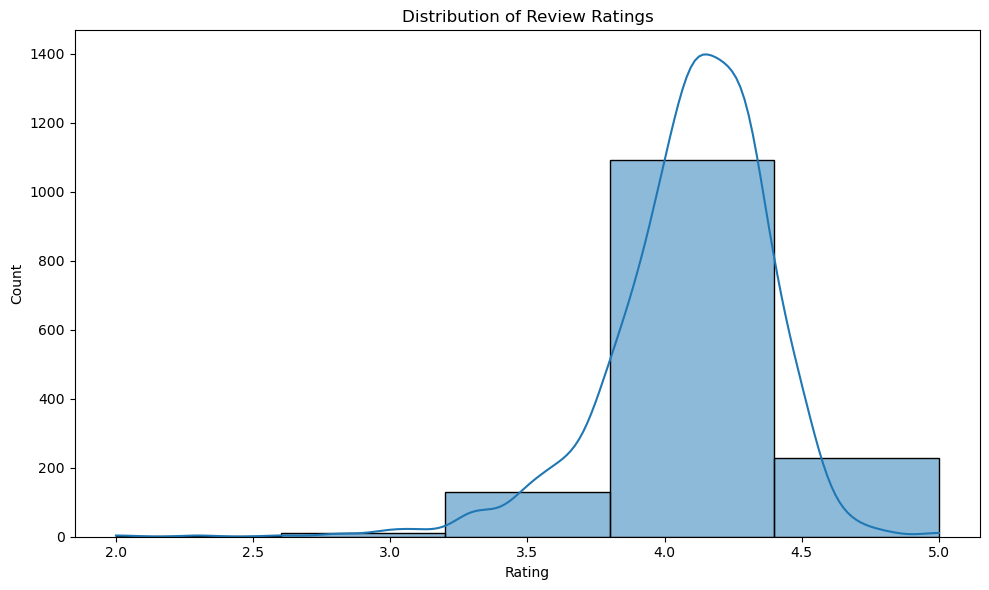

In [15]:
# Analyze the distribution of review ratings
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='rating', bins=5, kde=True)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Review Ratings')
plt.tight_layout()
plt.show()

C:\Users\roma\Desktop\data_science_projects\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\roma\Desktop\data_science_projects\env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='rating_count', ylabel='Count'>

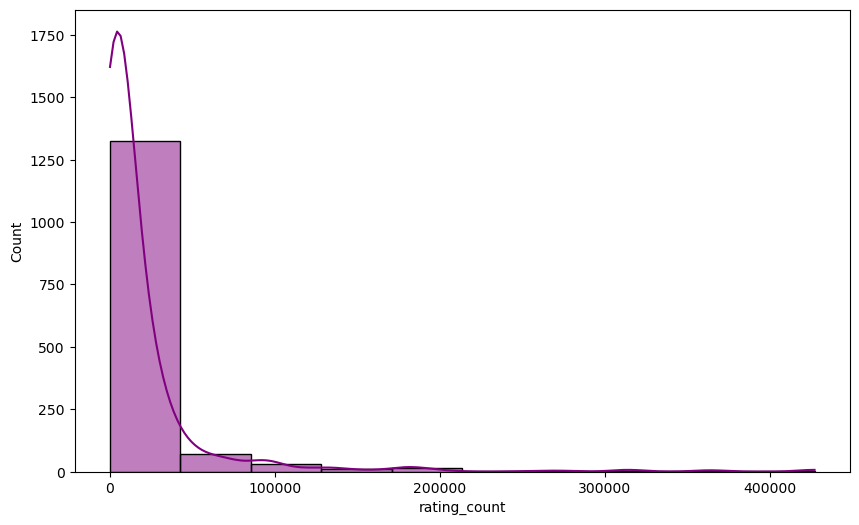

In [16]:
# Analyze the distribution of  ratings count
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='rating_count', bins=10, kde=True, color='purple')

C:\Users\roma\Desktop\data_science_projects\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\roma\Desktop\data_science_projects\env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


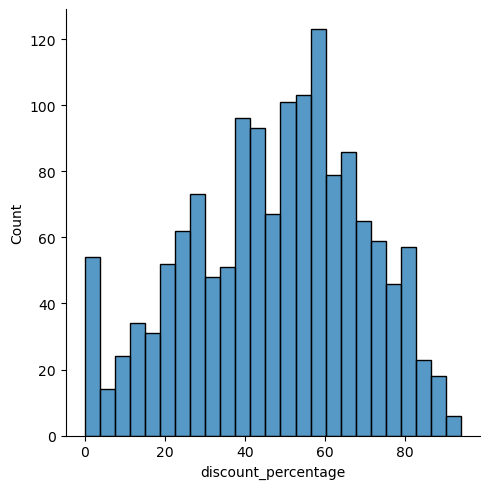

In [17]:
# Analyze the distribution of discount_percentage
sns.displot(df['discount_percentage'],bins=25)

C:\Users\roma\Desktop\data_science_projects\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\roma\Desktop\data_science_projects\env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='discounted_price', ylabel='Count'>

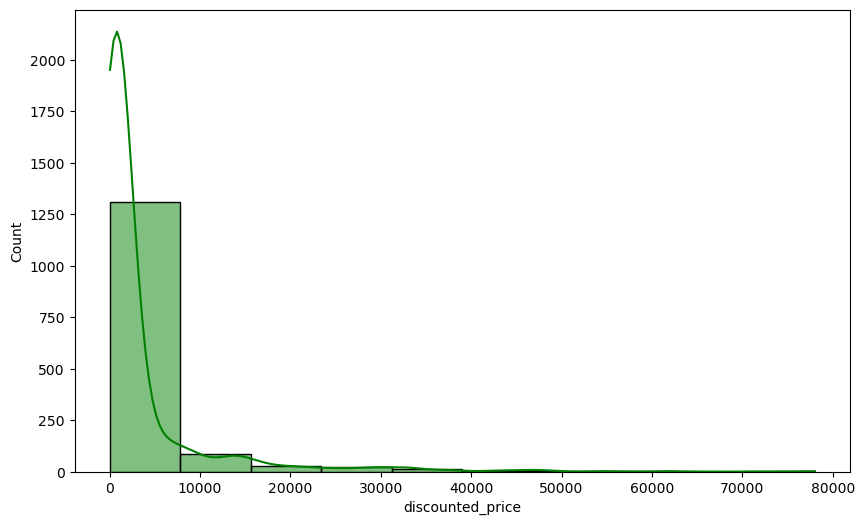

In [18]:
# Analyze the distribution of discount price
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='discounted_price', bins=10, kde=True, color='green')

C:\Users\roma\Desktop\data_science_projects\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\roma\Desktop\data_science_projects\env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='actual_price', ylabel='Count'>

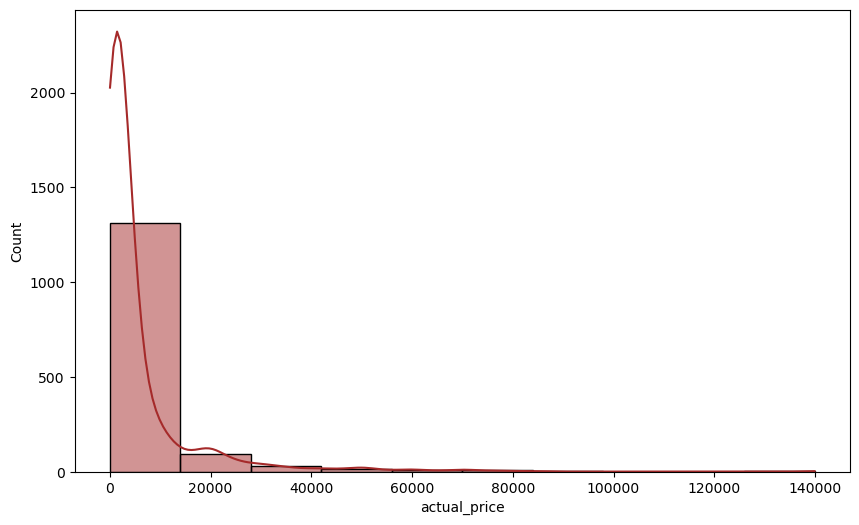

In [19]:
# Analyze the distribution of actual price
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='actual_price', bins=10, kde=True, color='brown')

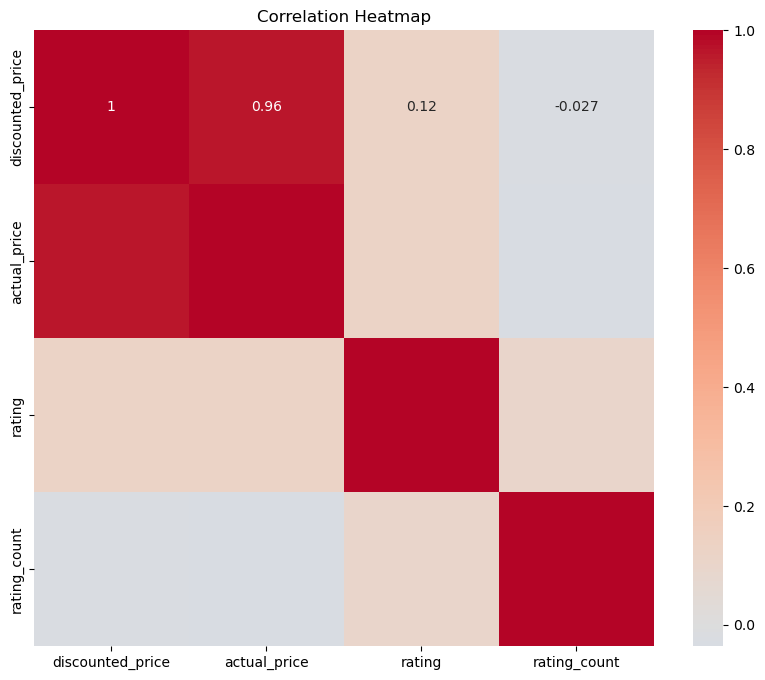

In [20]:
#correlation

numeric_columns = ['discounted_price', 'actual_price', 'rating', 'rating_count']  # Add your numeric column names here
correlation_matrix = df[numeric_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()


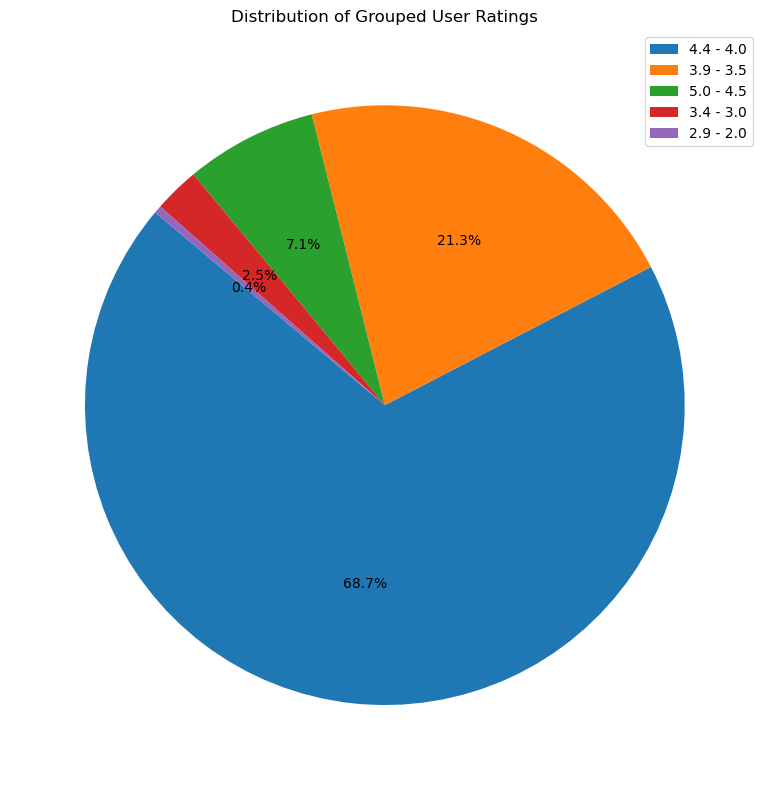

In [21]:
# distribution of user rating by groups

# Define rating categories and their corresponding ranges
rating_categories = {
    '5.0 - 4.5': (5.0, 4.5),
    '4.4 - 4.0': (4.4, 4.0),
    '3.9 - 3.5': (3.9, 3.5),
    '3.4 - 3.0': (3.4, 3.0),
    '2.9 - 2.0': (2.9, 2.0),
    '1.9 - 1.0': (1.9, 1.0)
}

# Create a new column to represent the grouped rating category
def get_rating_category(rating):
    for category, (upper, lower) in rating_categories.items():
        if lower <= rating <= upper:
            return category
    return 'Below 1.0'

df['rating_category'] = df['rating'].apply(get_rating_category)

# Calculate the distribution of grouped rating categories
rating_category_counts = df['rating_category'].value_counts()

# Create a pie chart for grouped rating categories
plt.figure(figsize=(8, 8))
plt.pie(rating_category_counts, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Grouped User Ratings')
plt.legend(rating_category_counts.index, loc='best')  # Use legend instead of labels
plt.tight_layout()
plt.show()


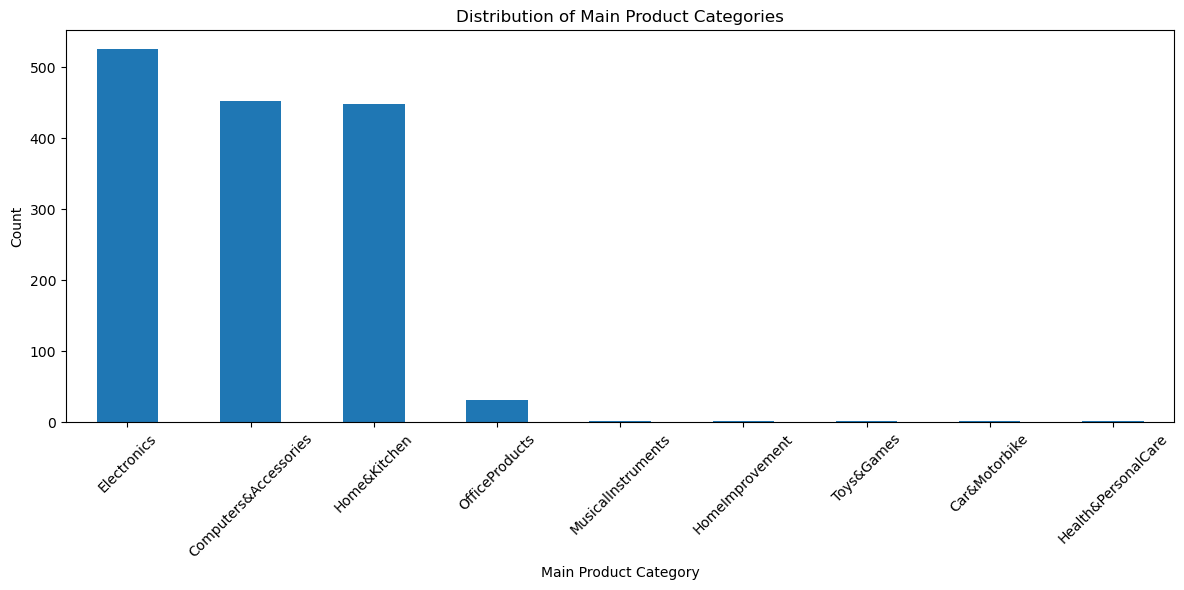

In [22]:
# distribution of product category by groups
def extract_main_category(category):
    return category.split('|')[0]

# Apply the function to create a new column with the main category
df['main_category'] = df['category'].apply(extract_main_category)

# Calculate the counts of each main product category
category_counts = df['main_category'].value_counts()

# Create a bar plot for main product categories
plt.figure(figsize=(12, 6))
category_counts.plot(kind='bar')
plt.xlabel('Main Product Category')
plt.ylabel('Count')
plt.title('Distribution of Main Product Categories')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


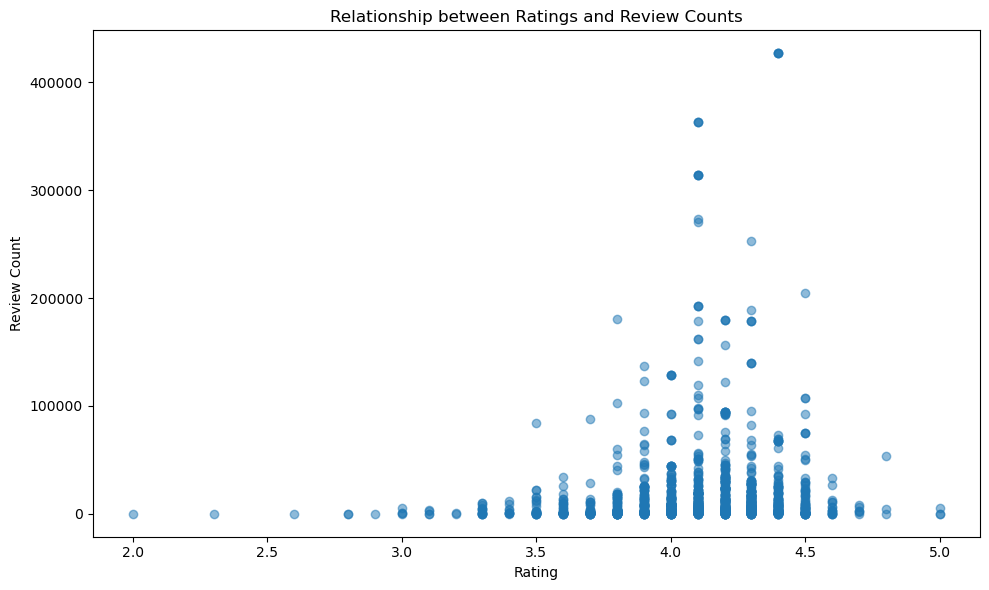

In [23]:
# Create a scatter plot for ratings and review counts
plt.figure(figsize=(10, 6))
plt.scatter(df['rating'], df['rating_count'], alpha=0.5)
plt.xlabel('Rating')
plt.ylabel('Review Count')
plt.title('Relationship between Ratings and Review Counts')
plt.tight_layout()
plt.show()


#### Product insights

In [24]:
# Identify the top-rated products
top_rated_products = df.sort_values(by='rating', ascending=False)
top_rated_products = top_rated_products[['product_name', 'rating']].head(10)  # Get top 10
print("Top-rated products:")
print(top_rated_products)


Top-rated products:
                                           product_name  rating
324   REDTECH USB-C to Lightning Cable 3.3FT, [Apple...     5.0
174   Syncwire LTG to USB Cable for Fast Charging Co...     5.0
775   Amazon Basics Wireless Mouse | 2.4 GHz Connect...     5.0
1145  Swiffer Instant Electric Water Heater Faucet T...     4.8
1201  Oratech Coffee Frother electric, milk frother ...     4.8
1299  Instant Pot Air Fryer, Vortex 2QT, Touch Contr...     4.8
249   Sony Bravia 164 cm (65 inches) 4K Ultra HD Sma...     4.7
1388  Campfire Spring Chef Prolix Instant Portable W...     4.7
1226  Zuvexa USB Rechargeable Electric Foam Maker - ...     4.7
459   Spigen EZ Fit Tempered Glass Screen Protector ...     4.7


In [25]:
# # Analyze distribution of products across categories
# category_distribution = df['category'].value_counts()
# print("\nDistribution of products across categories:")
# print(category_distribution)

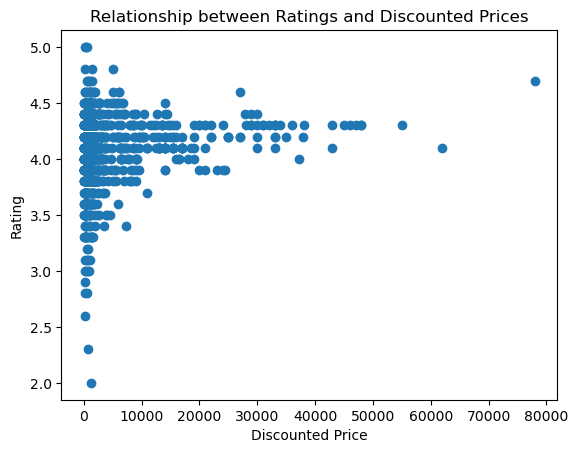

In [26]:
# Investigate relationship between ratings and discounted prices
plt.scatter(df['discounted_price'], df['rating'])
plt.xlabel('Discounted Price')
plt.ylabel('Rating')
plt.title('Relationship between Ratings and Discounted Prices')
plt.show()

#### Price and Discount Analysis

C:\Users\roma\Desktop\data_science_projects\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\roma\Desktop\data_science_projects\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\roma\Desktop\data_science_projects\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


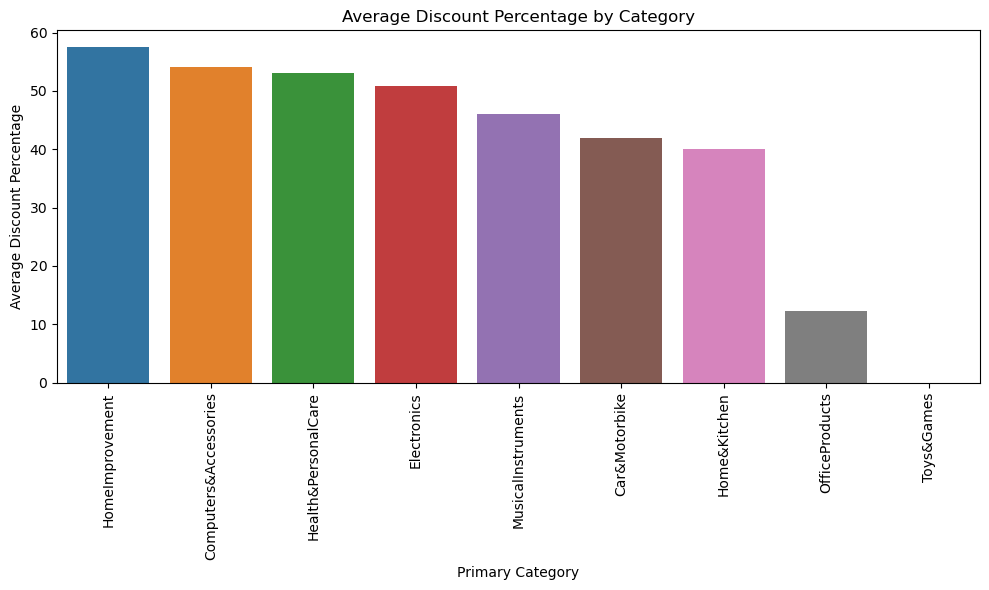

In [27]:
# Extract primary category
df['primary_category'] = df['category'].apply(lambda x: x.split('|')[0])

# Examine average discount percentage across categories
category_avg_discount = df.groupby('primary_category')['discount_percentage'].mean().reset_index()
category_avg_discount = category_avg_discount.sort_values(by='discount_percentage', ascending=False)

# Visualize average discount percentage by category
plt.figure(figsize=(10, 6))
sns.barplot(x='primary_category', y='discount_percentage', data=category_avg_discount)
plt.xticks(rotation=90)
plt.xlabel('Primary Category')
plt.ylabel('Average Discount Percentage')
plt.title('Average Discount Percentage by Category')
plt.tight_layout()
plt.show()

C:\Users\roma\Desktop\data_science_projects\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\roma\Desktop\data_science_projects\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


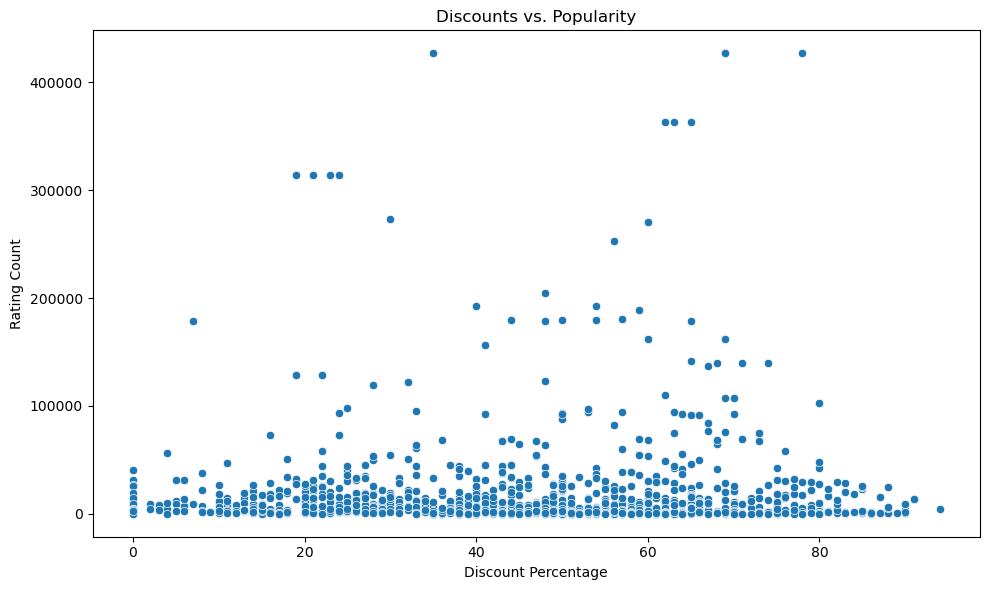

In [28]:
# Visualize how discounts affect popularity (rating count)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='discount_percentage', y='rating_count', data=df)
plt.xlabel('Discount Percentage')
plt.ylabel('Rating Count')
plt.title('Discounts vs. Popularity')
plt.tight_layout()
plt.show()

C:\Users\roma\Desktop\data_science_projects\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\roma\Desktop\data_science_projects\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


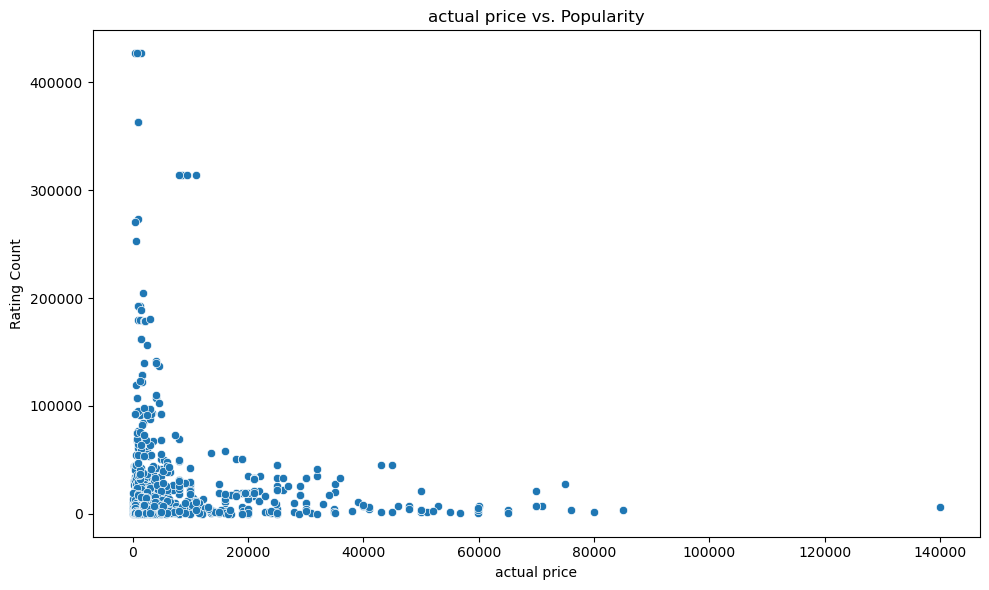

In [29]:
# Visualize how actual price affect popularity (rating count)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='actual_price', y='rating_count', data=df)
plt.xlabel('actual price')
plt.ylabel('Rating Count')
plt.title('actual price vs. Popularity')
plt.tight_layout()
plt.show()

C:\Users\roma\Desktop\data_science_projects\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\roma\Desktop\data_science_projects\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


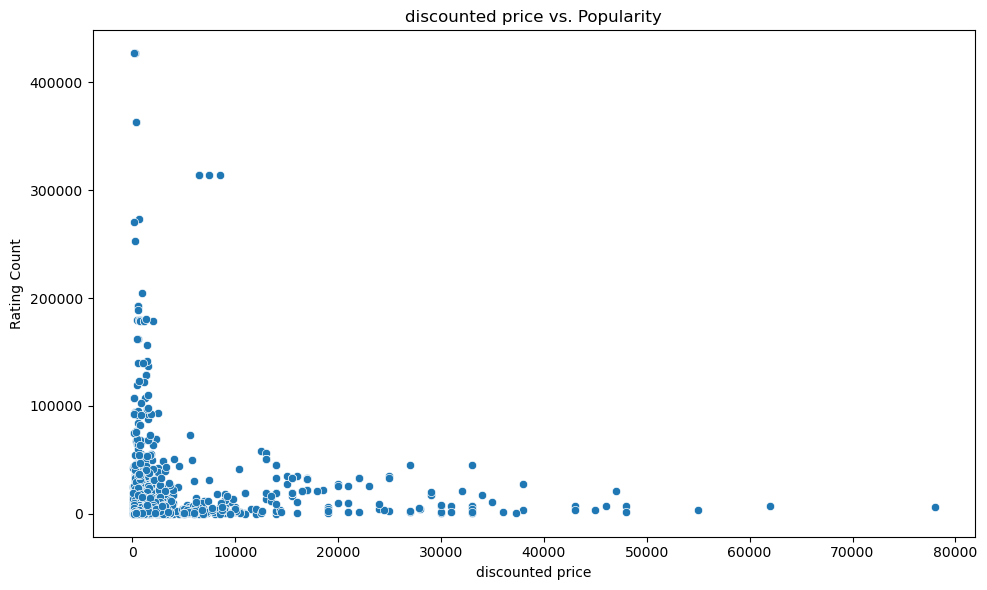

In [30]:
# Visualize how actual price affect popularity (rating count)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='discounted_price', y='rating_count', data=df)
plt.xlabel('discounted price')
plt.ylabel('Rating Count')
plt.title('discounted price vs. Popularity')
plt.tight_layout()
plt.show()

#### Price vs. Rating:

C:\Users\roma\Desktop\data_science_projects\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\roma\Desktop\data_science_projects\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


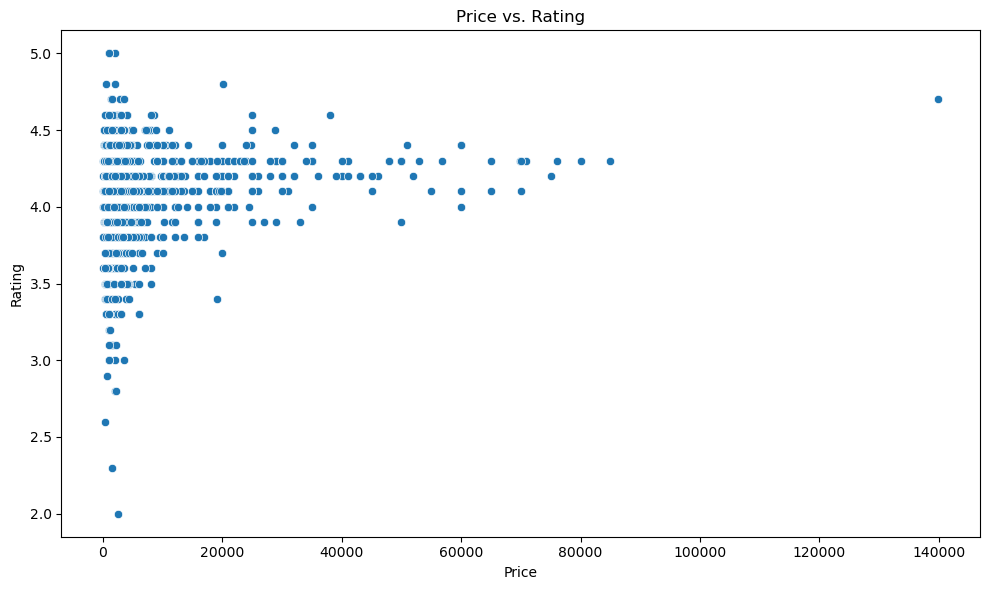

C:\Users\roma\AppData\Local\Temp\ipykernel_9584\2011508809.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_ratings_by_price_range = df.groupby('price_range')['rating'].mean()
C:\Users\roma\Desktop\data_science_projects\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\roma\Desktop\data_science_projects\env\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_v

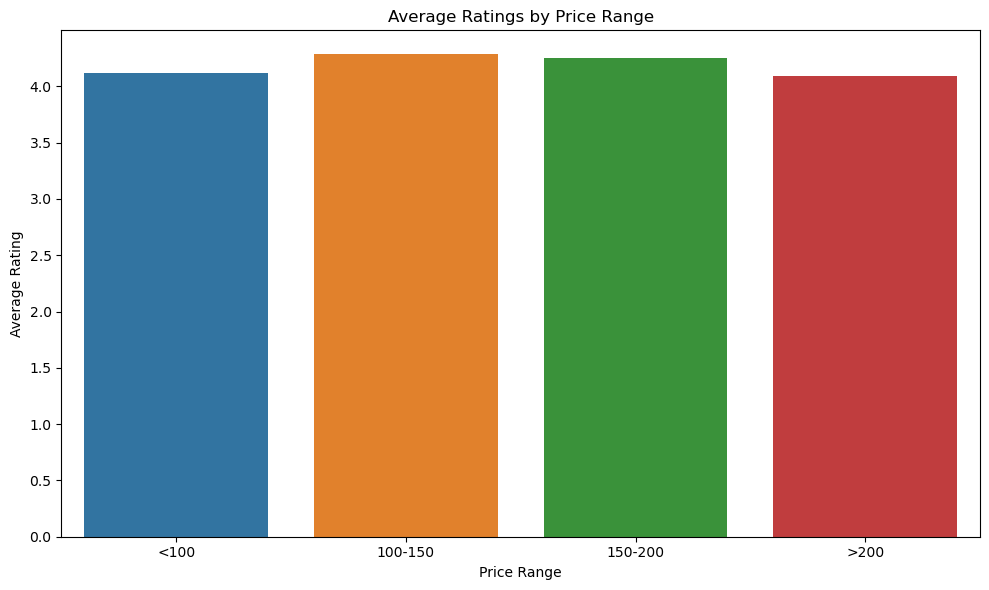

In [31]:
# Explore correlation between product prices and ratings
plt.figure(figsize=(10, 6))
sns.scatterplot(x='actual_price', y='rating', data=df)
plt.xlabel('Price')
plt.ylabel('Rating')
plt.title('Price vs. Rating')
plt.tight_layout()
plt.show()

# Group products into price ranges and analyze average ratings
price_ranges = [0, 100, 150, 200, float('inf')]
price_labels = ['<100', '100-150', '150-200', '>200']
df['price_range'] = pd.cut(df['actual_price'], bins=price_ranges, labels=price_labels)

average_ratings_by_price_range = df.groupby('price_range')['rating'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=average_ratings_by_price_range.index, y=average_ratings_by_price_range.values)
plt.xlabel('Price Range')
plt.ylabel('Average Rating')
plt.title('Average Ratings by Price Range')
plt.tight_layout()
plt.show()


#### user engagement

C:\Users\roma\Desktop\data_science_projects\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\roma\Desktop\data_science_projects\env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


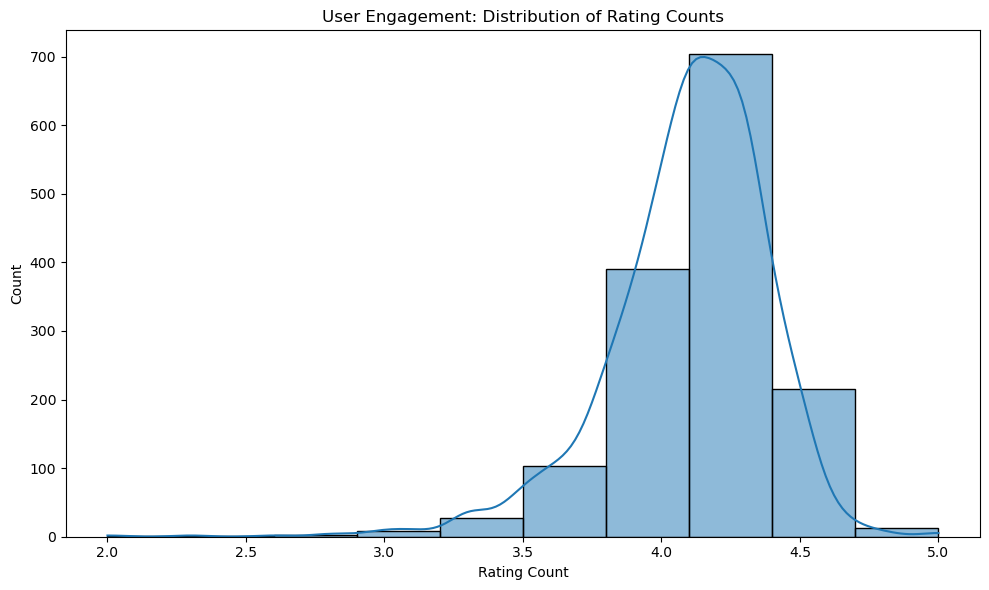

Top Users by Rating Count:
     product_id                                       product_name  \
12   B07KSMBL2H  AmazonBasics Flexible Premium HDMI Cable (Blac...   
47   B014I8SSD0  Amazon Basics High-Speed HDMI Cable, 6 Feet - ...   
65   B014I8SX4Y  Amazon Basics High-Speed HDMI Cable, 6 Feet (2...   
684  B07KSMBL2H  AmazonBasics Flexible Premium HDMI Cable (Blac...   
352  B07GPXXNNG  boAt Bassheads 100 in Ear Wired Earphones with...   

                                              category  discounted_price  \
12   Electronics|HomeTheater,TV&Video|Accessories|C...             219.0   
47   Electronics|HomeTheater,TV&Video|Accessories|C...             309.0   
65   Electronics|HomeTheater,TV&Video|Accessories|C...             309.0   
684  Electronics|HomeTheater,TV&Video|Accessories|C...             219.0   
352  Electronics|Headphones,Earbuds&Accessories|Hea...             349.0   

     actual_price  discount_percentage  rating  rating_count  \
12          700.0              

C:\Users\roma\Desktop\data_science_projects\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\roma\Desktop\data_science_projects\env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


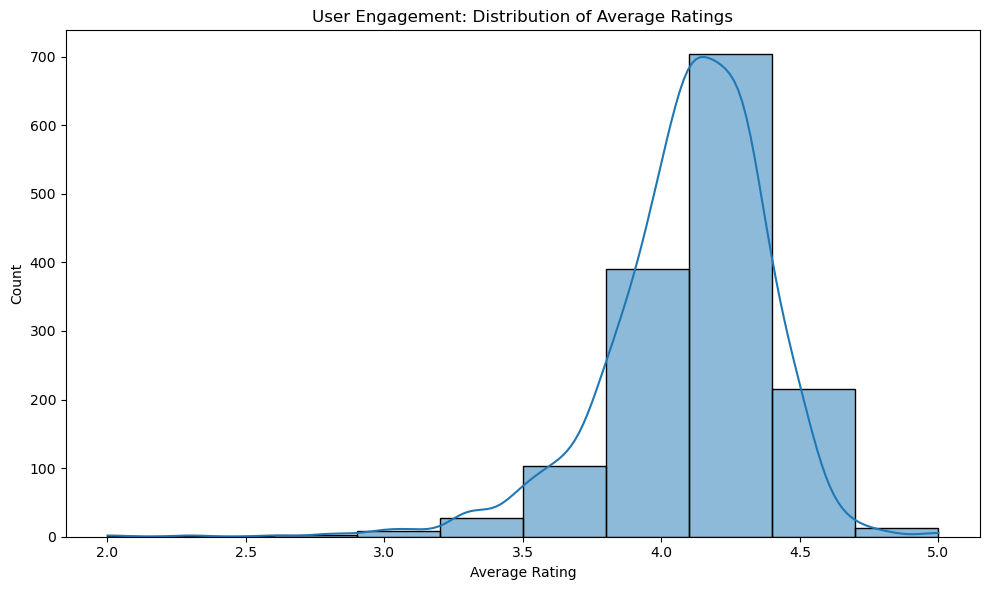

Top Users by Average Rating:
      product_id                                       product_name  \
174   B0BP7XLX48  Syncwire LTG to USB Cable for Fast Charging Co...   
324   B0BQRJ3C47  REDTECH USB-C to Lightning Cable 3.3FT, [Apple...   
775   B09ZHCJDP1  Amazon Basics Wireless Mouse | 2.4 GHz Connect...   
1145  B0BR4F878Q  Swiffer Instant Electric Water Heater Faucet T...   
1201  B0BQ3K23Y1  Oratech Coffee Frother electric, milk frother ...   

                                               category  discounted_price  \
174   Computers&Accessories|Accessories&Peripherals|...             399.0   
324   Computers&Accessories|Accessories&Peripherals|...             249.0   
775   Computers&Accessories|Accessories&Peripherals|...             499.0   
1145  Home&Kitchen|Heating,Cooling&AirQuality|WaterH...            1439.0   
1201  Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...             279.0   

      actual_price  discount_percentage  rating  rating_count  \
174         1999

In [32]:
# Investigate user engagement in terms of rating count
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='rating', bins=10, kde=True)
plt.xlabel('Rating Count')
plt.ylabel('Count')
plt.title('User Engagement: Distribution of Rating Counts')
plt.tight_layout()
plt.show()

# Identify top users based on rating count
top_users_by_rating_count = df.nlargest(5, 'rating_count')
print("Top Users by Rating Count:")
print(top_users_by_rating_count)

# Investigate user engagement in terms of average rating
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='rating', bins=10, kde=True)
plt.xlabel('Average Rating')
plt.ylabel('Count')
plt.title('User Engagement: Distribution of Average Ratings')
plt.tight_layout()
plt.show()

# Identify top users based on average rating
top_users_by_average_rating = df.nlargest(5, 'rating')
print("Top Users by Average Rating:")
print(top_users_by_average_rating)


#### test the hypothesis 

Correlation between discount_percentage and rating_count: 0.01


C:\Users\roma\AppData\Local\Temp\ipykernel_9584\1681523881.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_rating_count_by_discount = df.groupby('discount_range')['rating_count'].mean()
C:\Users\roma\Desktop\data_science_projects\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\roma\Desktop\data_science_projects\env\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  g

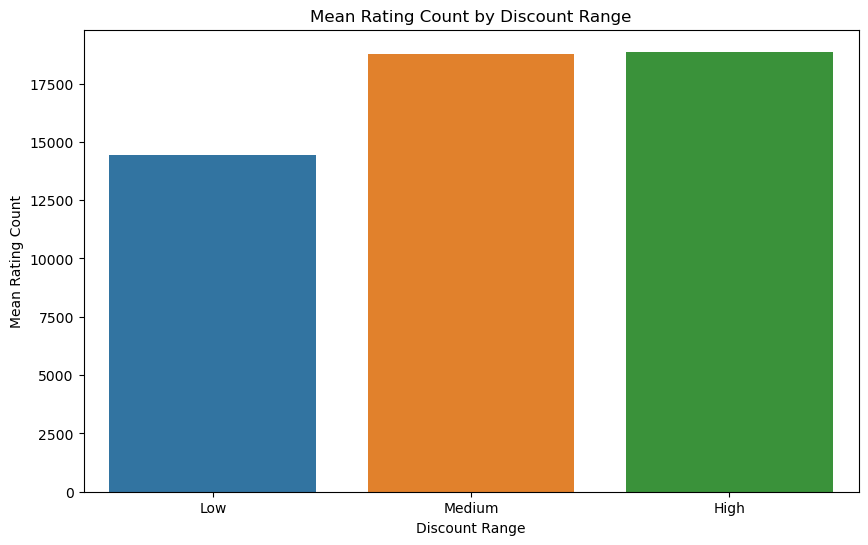

ANOVA p-value: 0.4356


In [33]:
#1.Products with higher discounts have a higher likelihood of receiving 
#a larger number of reviews

# Calculate the correlation between discount_percentage and rating_count
correlation = df['discount_percentage'].corr(df['rating_count'])
print(f"Correlation between discount_percentage and rating_count: {correlation:.2f}")

# Group products by discount ranges
bins = [-1, 20, 50, 100]  # Define your own discount ranges
labels = ['Low', 'Medium', 'High']
df['discount_range'] = pd.cut(df['discount_percentage'], bins=bins, labels=labels)

# Calculate the mean rating_count for each discount range
mean_rating_count_by_discount = df.groupby('discount_range')['rating_count'].mean()

# Visualize the relationship
plt.figure(figsize=(10, 6))
sns.barplot(x=mean_rating_count_by_discount.index, y=mean_rating_count_by_discount.values)
plt.xlabel('Discount Range')
plt.ylabel('Mean Rating Count')
plt.title('Mean Rating Count by Discount Range')
plt.show()

# Perform ANOVA to test for significant differences in review counts among different discount ranges
low_discount = df[df['discount_range'] == 'Low']['rating_count']
medium_discount = df[df['discount_range'] == 'Medium']['rating_count']
high_discount = df[df['discount_range'] == 'High']['rating_count']

anova_result = f_oneway(low_discount, medium_discount, high_discount)
print(f"ANOVA p-value: {anova_result.pvalue:.4f}")


A p-value of 0.4356 obtained from the ANOVA test suggests that there is no significant difference in average ratings among the different price ranges

C:\Users\roma\Desktop\data_science_projects\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\roma\Desktop\data_science_projects\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


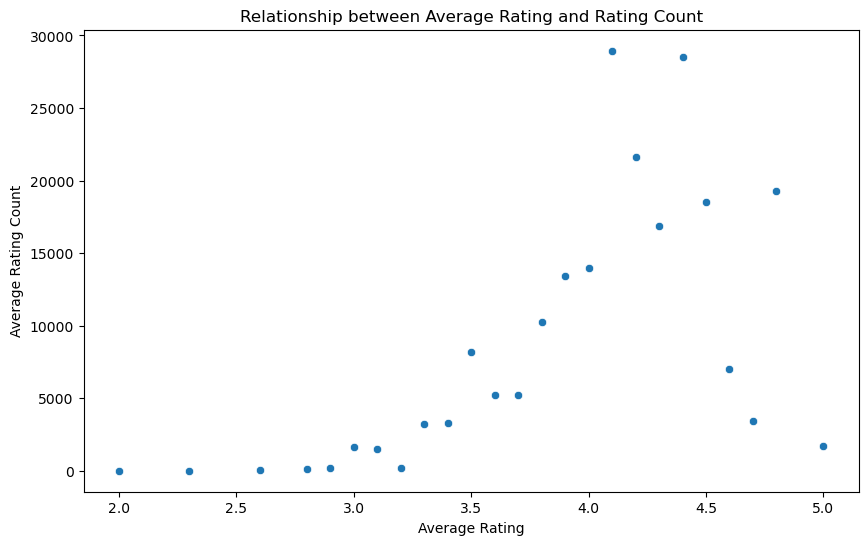

ANOVA Result:
ANOVA p-value: 7.297331081782864e-06


C:\Users\roma\AppData\Local\Temp\ipykernel_9584\2333903303.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  anova_result = stats.f_oneway(*[group['rating_count'] for name, group in df.groupby('rating_bin')])


In [34]:
#2.Products with higher average ratings tend to have a higher number of reviews.
import scipy.stats as stats

# Group products by average ratings and calculate mean rating count for each group
rating_groups = df.groupby('rating')['rating_count'].mean()

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=rating_groups.index, y=rating_groups.values)
plt.xlabel('Average Rating')
plt.ylabel('Average Rating Count')
plt.title('Relationship between Average Rating and Rating Count')
plt.show()


# Create bins for ratings
bins = [1, 2, 3, 4, 5]
bin_labels = ['1-2', '2-3', '3-4', '4-5']

# Categorize ratings into bins
df['rating_bin'] = pd.cut(df['rating'], bins=bins, labels=bin_labels)

# Perform ANOVA
anova_result = stats.f_oneway(*[group['rating_count'] for name, group in df.groupby('rating_bin')])

# Print ANOVA result
print("ANOVA Result:")
print("ANOVA p-value:", anova_result.pvalue)


The ANOVA result you obtained with a p-value of approximately 7.30e-06 indicates that there is a statistically significant difference in the number of reviews (rating counts) across different rating ranges. In other words, the average number of reviews varies significantly between products with different rating ranges.

C:\Users\roma\AppData\Local\Temp\ipykernel_9584\3670262134.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_rating_by_price = df.groupby('price_range')['rating'].mean()
C:\Users\roma\Desktop\data_science_projects\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\roma\Desktop\data_science_projects\env\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals

Correlation between actual_price and rating: 0.12


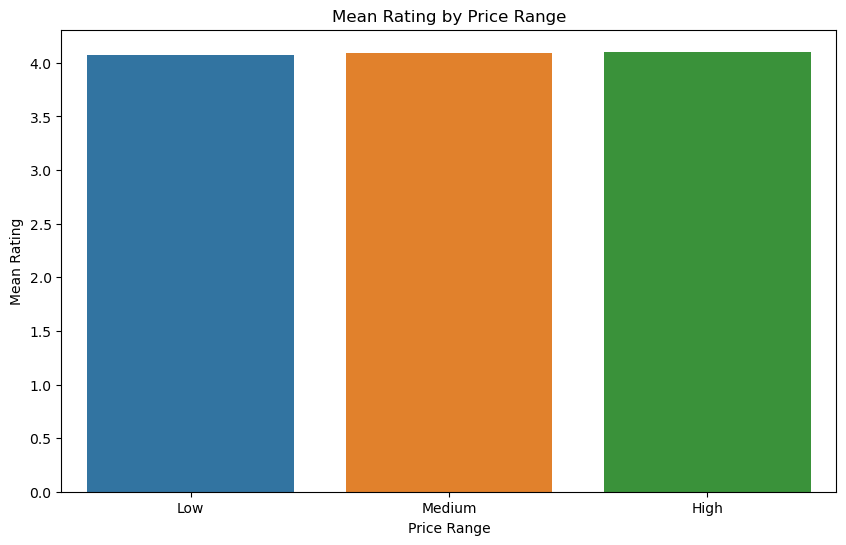

ANOVA p-value: 0.3617


In [35]:
#3.Products with higher original prices tend to have higher average ratings.
# Calculate the correlation between actual_price and rating
correlation = df['actual_price'].corr(df['rating'])
print(f"Correlation between actual_price and rating: {correlation:.2f}")

# Group products by price ranges
bins = [0, 500, 1000, np.inf]  # Define your own price ranges
labels = ['Low', 'Medium', 'High']
df['price_range'] = pd.cut(df['actual_price'], bins=bins, labels=labels)

# Calculate the mean rating for each price range
mean_rating_by_price = df.groupby('price_range')['rating'].mean()

# Visualize the relationship
plt.figure(figsize=(10, 6))
sns.barplot(x=mean_rating_by_price.index, y=mean_rating_by_price.values)
plt.xlabel('Price Range')
plt.ylabel('Mean Rating')
plt.title('Mean Rating by Price Range')
plt.show()

# Perform ANOVA to test for significant differences in average ratings among different price ranges
low_price = df[df['price_range'] == 'Low']['rating']
medium_price = df[df['price_range'] == 'Medium']['rating']
high_price = df[df['price_range'] == 'High']['rating']

anova_result = f_oneway(low_price, medium_price, high_price)
print(f"ANOVA p-value: {anova_result.pvalue:.4f}")


A p-value of 0.3617 from the ANOVA test for the relationship between product prices and ratings suggests that there is no statistically significant difference in the average ratings among different price ranges

C:\Users\roma\Desktop\data_science_projects\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\roma\Desktop\data_science_projects\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\roma\Desktop\data_science_projects\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


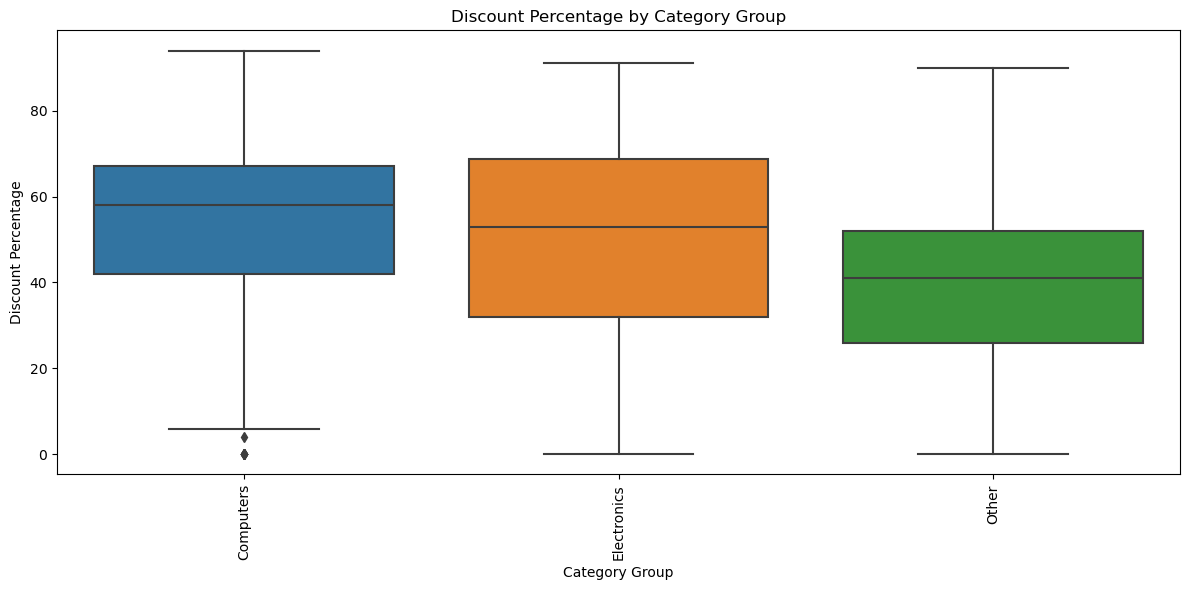

ANOVA Result:
ANOVA p-value: 0.0000


In [36]:
#4.Some product categories tend to have higher average discounts than others
# Define groups of categories and their corresponding names
category_groups = {
    'Electronics': ['Electronics', 'HomeTheater,TV&Video'],
    'Computers': ['Computers&Accessories', 'Accessories&Peripherals'],
    # Define more groups as needed
}

# Create a new column 'category_group' to map categories to groups
df['category_group'] = df['category'].apply(lambda cat: next((group for group, cats in category_groups.items() if any(c in cat for c in cats)), 'Other'))

# Group products by category group and calculate the discount_percentage for each group
discounts_by_group = {group: df[df['category_group'] == group]['discount_percentage'].values for group in df['category_group'].unique()}

# Visualize the relationship
plt.figure(figsize=(12, 6))
sns.boxplot(x='category_group', y='discount_percentage', data=df)
plt.xlabel('Category Group')
plt.ylabel('Discount Percentage')
plt.title('Discount Percentage by Category Group')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Perform ANOVA to test for significant differences in average discounts among category groups
anova_result = f_oneway(*discounts_by_group.values())  # Pass multiple arrays
p_value = anova_result.pvalue

print("ANOVA Result:")
print(f"ANOVA p-value: {p_value:.4f}")


The ANOVA p-value of 0.0000 suggests that there is a statistically significant difference in the average discounts among the different category groups. In other words, the average discounts are not equal across all category groups, and at least one category group has a significantly different average discount from the others.

In [37]:
#5.Products with higher average ratings tend to have a higher proportion of positive reviews
#in their content.
import statsmodels.api as sm

# Calculate average ratings for each product
average_ratings = df.groupby('product_id')['rating'].mean()

# Categorize reviews as positive or non-positive
threshold = 4
df['positive_review'] = df['rating'] > threshold

# Reset index for average_ratings to align with df['positive_review']
average_ratings = average_ratings.reset_index(drop=True)

# Drop rows with missing values
logit_df = pd.concat([average_ratings, df['positive_review']], axis=1).dropna()

X = sm.add_constant(logit_df['rating'])
y = logit_df['positive_review']
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Print the logistic regression summary
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.650848
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:        positive_review   No. Observations:                 1351
Model:                          Logit   Df Residuals:                     1349
Method:                           MLE   Df Model:                            1
Date:                Wed, 29 Nov 2023   Pseudo R-squ.:               0.0003894
Time:                        23:04:58   Log-Likelihood:                -879.30
converged:                       True   LL-Null:                       -879.64
Covariance Type:            nonrobust   LLR p-value:                    0.4079
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2445      0.793      1.570      0.117      -0.310       2.799
rating        -0.1592      0.

the results suggest that the average rating has a slight influence on the likelihood of positive reviews, but the relationship may not be statistically significant at the conventional significance level of 0.05. The results also indicate that other factors not included in the model might contribute more significantly to the likelihood of positive reviews

# insights

1.Customer Feedback and Ratings:
The majority of products in the dataset have positive ratings, with an average rating of approximately 4.1.

Products with higher average ratings tend to have a higher number of reviews, suggesting that well-rated products attract more customer feedback.

There is a strong positive correlation between average ratings and the number of reviews
    
2.Category Impact: Specific product categories stand out as having higher levels of customer engagement. These categories also exhibit higher average discounts, indicating that discounts play a role in driving customer interest within these categories.

3.Discount and Category: Through category-based analysis, it's evident that certain product categories consistently offer higher average discounts. This insight can guide marketing efforts and pricing strategies to capitalize on the popularity of these categories.

4.Discounts and Reviews: Products with larger discounts tend to have a higher likelihood of garnering more reviews. This suggests that offering attractive discounts can stimulate customer interest and engagement, leading to increased customer feedback.

5.Original Price and Ratings: However, there isn't a statistically significant relationship between higher original prices and higher average ratings. While price doesn't appear to be a primary driver of ratings, other factors may play a more prominent role in determining customer satisfaction.

6.Category-Specific Pricing: Your analysis highlights that specific product categories consistently offer higher average discounts. This information can be leveraged in pricing strategies to tailor discounts for each category based on customer preferences and market trends.


## Decisions
1.Focus on maintaining product quality to encourage positive ratings, as this will likely result in more customer feedback and increased product visibility

2.Encourage customers to leave reviews after a positive experience. Highlight positive reviews in marketing materials to build trust and credibility

3.offer discounts within categories that are already popular. Monitor customer response to different discount levels.

4.Invest in marketing campaigns that highlight these popular categories and emphasize the discounts. Consider bundling related products to further increase engagement.

5.Implement dynamic pricing strategies where higher discounts are applied to products that need a boost in customer engagement. 

6.There isn't a strong correlation between higher original prices and higher average ratings.
While pricing is important, it's not the sole factor influencing ratings. Prioritize product quality, features, and customer service to improve ratings

### Further Analysis

1. sentiment analysis

If you have review content, perform sentiment analysis to understand the sentiment distribution and correlations with other variables.

2. machine learning

Depending on your goals, you might consider building predictive models using machine learning algorithms.
For example, you could predict product ratings based on other features in the dataset